# Grid-Independent Detection System

## Architecture Overview

This simulation uses a **hybrid approach** that combines the best of both worlds:

### Grid-Based (for UI convenience):
- **Observable/non-observable region selection**: The grid mask allows easy UI-based region selection (click cells to mark as observable/non-observable)
- **Initial position selection**: Optionally place attackers, detectors, and targets by clicking grid cells

### Continuous (for accurate physics):
- **All trajectories**: Generated in continuous physical coordinates (meters)
- **All detection probabilities**: Computed continuously using detector response functions
- **All statistics**: Time in region, detection rates, cumulative probabilities — all continuous

### Key Parameters:
- `width`, `height`: Number of grid cells (for UI/mask)
- `cell_size`: Physical size of each cell in meters (default 1.0)
- Physical extent: `[0, width*cell_size) × [0, height*cell_size)` meters

### Grid Independence:
**Detection statistics do NOT depend on grid resolution!** Changing `cell_size` only affects:
1. Observability boundary granularity (coarser grid = blockier boundaries)
2. Visualization resolution

The test in `utils/test_grid_independence.py` verifies that detection probabilities remain identical across grid resolutions of 1m, 2m, 5m, and 10m per cell.

In [ ]:
# Example: Same physical scenario with different grid resolutions
# This demonstrates that detection statistics remain identical

import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'configs'))

import numpy as np
from src.env import SectorEnv
from src.attackers import Attacker
from src.detectors import Detector
from configs import detector_configs
from src.targets import PointTarget

# Physical scenario (in meters)
physical_width = 200.0
physical_height = 200.0
target = PointTarget.at_position(x=180.0, y=100.0, epsilon=0.5)

# Test with two different grid resolutions
print("=" * 70)
print("DEMONSTRATING GRID INDEPENDENCE")
print("=" * 70)

for cell_size in [1.0, 5.0]:
    print(f"\n{'='*70}")
    print(f"Cell size: {cell_size} meters per cell")
    print(f"{'='*70}")
    
    # Calculate grid dimensions
    width_cells = int(physical_width / cell_size)
    height_cells = int(physical_height / cell_size)
    
    print(f"Grid: {width_cells} × {height_cells} cells")
    print(f"Physical: {physical_width} × {physical_height} meters")
    
    # Create environment
    env = SectorEnv(width_cells, height_cells, target, 
                   default_observable=True, cell_size=cell_size)
    
    # Non-observable region: 50-150m in x, 50-150m in y (physical coords)
    nonobs_x0 = int(50.0 / cell_size)
    nonobs_y0 = int(50.0 / cell_size)
    nonobs_w = int(100.0 / cell_size)
    nonobs_h = int(100.0 / cell_size)
    
    env.set_rectangular_sector(nonobs_x0, nonobs_y0, nonobs_w, nonobs_h, observable=False)
    
    # Add detectors at fixed physical positions
    for pos in [(80.0, 100.0), (120.0, 100.0)]:
        env.add_detector(Detector(type=detector_configs.DetectorType.RADAR, position=pos))
    
    # Attacker flies through the region
    attacker = Attacker(
        start_position=(20.0, 100.0),
        target_position=(180.0, 100.0),
        speed=2.0,
        noise_std=0.0
    )
    attacker.position = attacker.trajectory[0]
    env.add_atk_drone(attacker)
    
    # Analyze
    analysis = env.analyze_trajectory(attacker.trajectory, time_per_step=1.0, only_nonobservable=True)
    
    print(f"\nResults:")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection: {analysis['cumulative_detection_prob']:.4f}")
    print(f"  Detection per second: {analysis['avg_detection_per_second']:.6f}")

print("\n" + "="*70)
print("✓ Detection statistics are identical despite different grid resolutions!")
print("="*70)

DEMONSTRATING GRID INDEPENDENCE

Cell size: 1.0 meters per cell
Grid: 200 × 200 cells
Physical: 200.0 × 200.0 meters

Results:
  Time in non-observable: 50.0s
  Cumulative detection: 1.0000
  Detection per second: 0.150824

Cell size: 5.0 meters per cell
Grid: 40 × 40 cells
Physical: 200.0 × 200.0 meters

Results:
  Time in non-observable: 50.0s
  Cumulative detection: 1.0000
  Detection per second: 0.150824

✓ Detection statistics are identical despite different grid resolutions!


Total physical area: 25000.0m × 25000.0m (25.0km × 25.0km)
Grid: 250 × 250 cells
Cell size: 100.0m per cell

Non-observable region (15km × 15km):
  Physical: 5.0km-20.0km × 5.0km-20.0km
  Size: 15.0km × 15.0km
  Grid cells: [50, 200) × [50, 200)

Detectors: 64 units placed at 2.0km spacing

Attackers: 5 drones
  Speed: 50 m/s (~180 km/h)
  Start: 1.0km from west edge (before non-obs region)
  Spread: 8.0km - 17.0km north
  Target: 18.5km east, 12.5km north
  Flight distance: ~17.5km
  Expected flight time: ~350s (~5.8 minutes)

TRAJECTORY ANALYSIS

Attacker 1:
  Total flight time: 361s (6.0 min)
  Time in non-observable: 279.0s (4.7 min)
  Cumulative detection prob: 0.00%
  Detection per second: 0.0000%

Attacker 1:
  Total flight time: 361s (6.0 min)
  Time in non-observable: 279.0s (4.7 min)
  Cumulative detection prob: 0.00%
  Detection per second: 0.0000%

Attacker 2:
  Total flight time: 357s (6.0 min)
  Time in non-observable: 273.0s (4.5 min)
  Cumulative detection prob: 0.00%
 

C:\Users\JoCraft\AppData\Local\Temp\ipykernel_22184\1789375805.py:196: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([f'{x/1000:.0f}' for x in ax1.get_xticks()])
C:\Users\JoCraft\AppData\Local\Temp\ipykernel_22184\1789375805.py:197: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f'{y/1000:.0f}' for y in ax1.get_yticks()])
C:\Users\JoCraft\AppData\Local\Temp\ipykernel_22184\1789375805.py:206: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{x/1000:.0f}' for x in ax2.get_xticks()])
C:\Users\JoCraft\AppData\Local\Temp\ipykernel_22184\1789375805.py:207: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f'{y/1000:.0f}' for y in ax2.get_yticks()])
C:\Users\JoCraft\AppData\Local\Temp\ipykernel_22184\1789375805.py:206: UserWarning: FixedFormatter should only be used together with FixedLocator
  

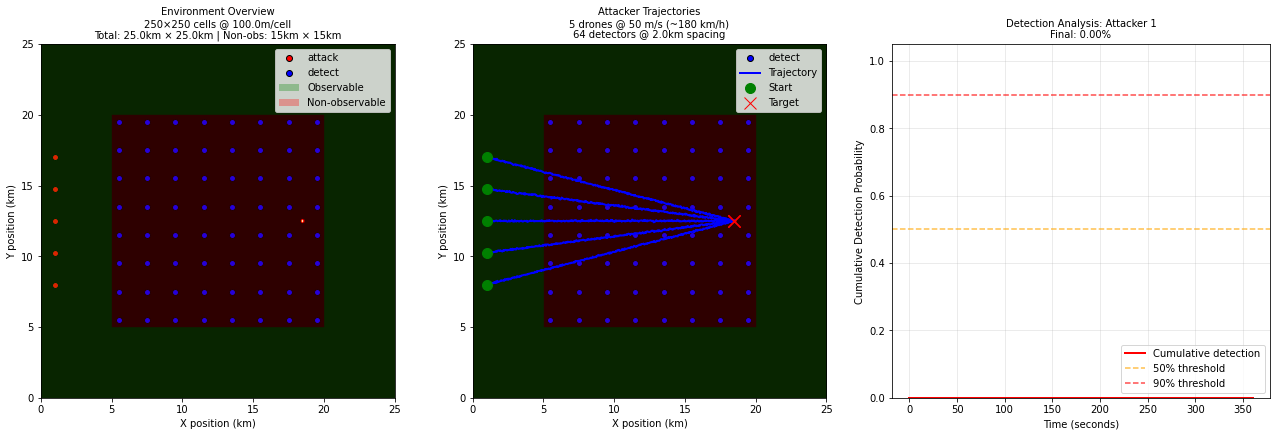

✓ Visualizations complete!

Note: All coordinates shown are in physical meters (axis labels in km).
Detection statistics are independent of grid resolution (cell_size=100.0m).

DETAILED TRAJECTORY ANALYSIS FOR EACH ATTACKER

--- Attacker 1 ---


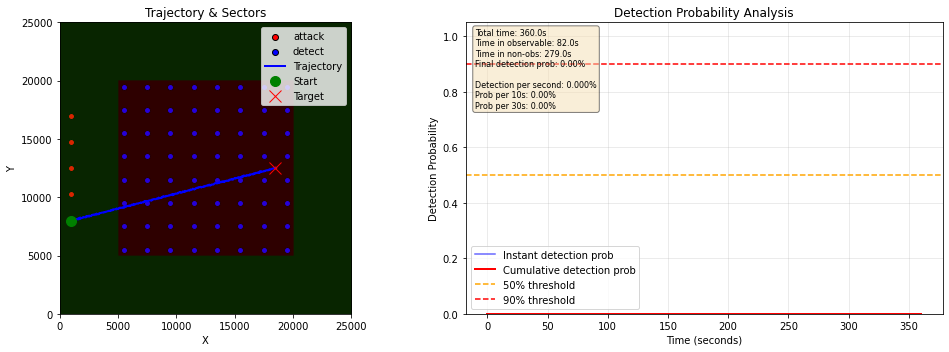


--- Attacker 2 ---


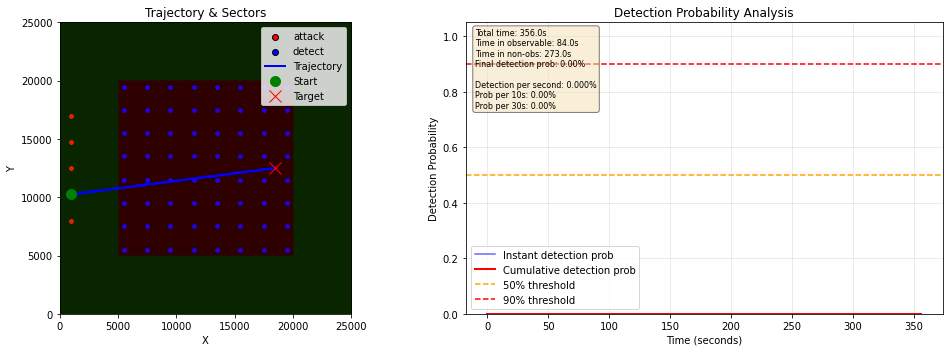


--- Attacker 3 ---


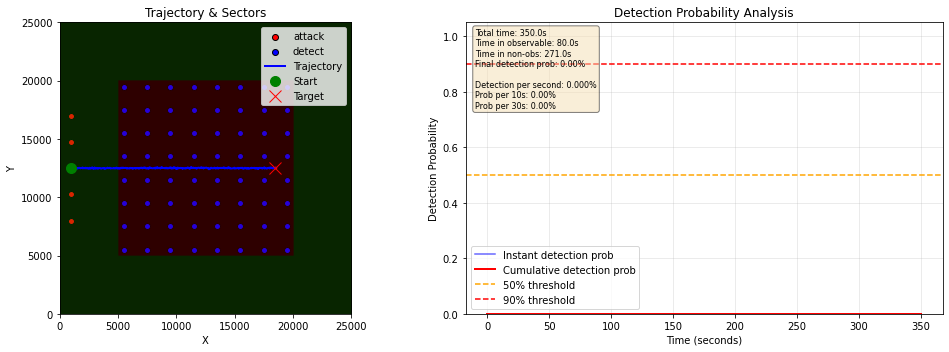


--- Attacker 4 ---


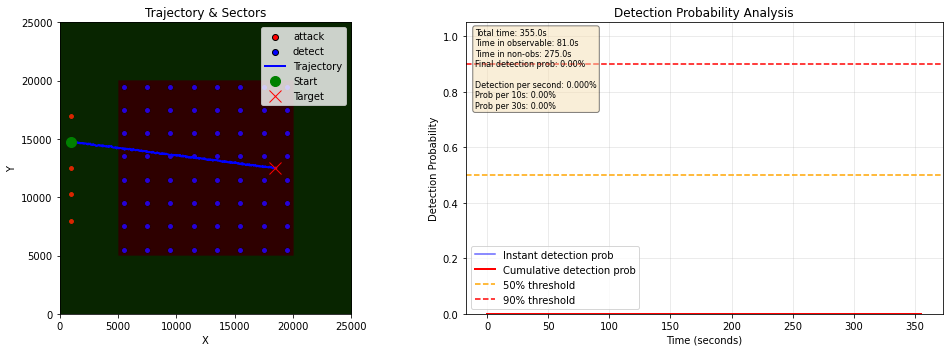


--- Attacker 5 ---


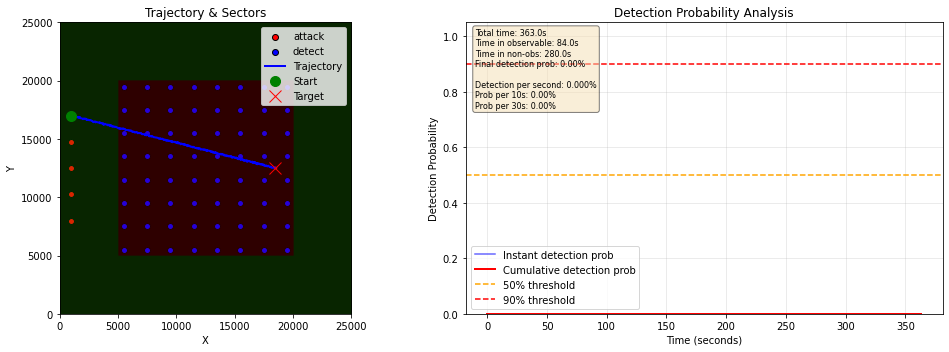

In [ ]:
# Complete Visualization Example: Grid-Independent Detection System
# This example shows a realistic scenario with physical coordinates and configurable cell size

import sys
import os

from configs import detector_configs
# Make sure the src and configs folders are importable
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'configs'))
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from targets import Gaussian, PointTarget
from env import Environment, SectorEnv
from attackers import Attacker
from detectors import Detector, Rect_Detectors

# ============================================================================
# PHYSICAL SCENARIO DEFINITION (all in meters)
# ============================================================================
# Non-observable region: 15km × 15km (the core area of interest)
nonobs_width_phys = 15000.0   # 15 km
nonobs_height_phys = 15000.0  # 15 km

# Add margin around the non-observable region
margin = 5000.0  # 5 km on each side

# Total physical area
physical_width = nonobs_width_phys + 2 * margin   # 25 km total
physical_height = nonobs_height_phys + 2 * margin  # 25 km total

cell_size = 100.0          # Each grid cell represents 100m × 100m

# Calculate grid dimensions (number of cells)
width_cells = int(physical_width / cell_size)   # 250 cells
height_cells = int(physical_height / cell_size)  # 250 cells

print(f"Total physical area: {physical_width}m × {physical_height}m ({physical_width/1000:.1f}km × {physical_height/1000:.1f}km)")
print(f"Grid: {width_cells} × {height_cells} cells")
print(f"Cell size: {cell_size}m per cell")

# ============================================================================
# CREATE ENVIRONMENT
# ============================================================================
# Target in the eastern part of the non-observable region
target_x = margin + nonobs_width_phys - 1500.0  # 1.5km from eastern edge of non-obs region
target_y = margin + nonobs_height_phys / 2       # Center vertically
target = PointTarget.at_position(x=target_x, y=target_y, epsilon=50.0)
sector_env = SectorEnv(width_cells, height_cells, target, 
                      default_observable=True, cell_size=cell_size)

# ============================================================================
# DEFINE NON-OBSERVABLE REGION (in physical coordinates, then convert to cells)
# ============================================================================
# The 15km × 15km non-observable region centered in the total area
nonobs_x0_phys = margin
nonobs_y0_phys = margin

# Convert to grid cells
nonobs_x0_cells = int(nonobs_x0_phys / cell_size)
nonobs_y0_cells = int(nonobs_y0_phys / cell_size)
nonobs_w_cells = int(nonobs_width_phys / cell_size)
nonobs_h_cells = int(nonobs_height_phys / cell_size)

sector_env.set_rectangular_sector(
    x0=nonobs_x0_cells,
    y0=nonobs_y0_cells,
    w=nonobs_w_cells,
    h=nonobs_h_cells,
    observable=False
)

print(f"\nNon-observable region (15km × 15km):")
print(f"  Physical: {nonobs_x0_phys/1000:.1f}km-{(nonobs_x0_phys+nonobs_width_phys)/1000:.1f}km × "
      f"{nonobs_y0_phys/1000:.1f}km-{(nonobs_y0_phys+nonobs_height_phys)/1000:.1f}km")
print(f"  Size: {nonobs_width_phys/1000:.1f}km × {nonobs_height_phys/1000:.1f}km")
print(f"  Grid cells: [{nonobs_x0_cells}, {nonobs_x0_cells+nonobs_w_cells}) × "
      f"[{nonobs_y0_cells}, {nonobs_y0_cells+nonobs_h_cells})")

# ============================================================================
# PLACE DETECTORS (in physical coordinates - meters)
# ============================================================================
# Use Rect_Detectors helper to create a grid inside the non-observable region
# Inset detectors 500m from the corridor edges
detector_corners = [
    (nonobs_x0_phys + 500, nonobs_y0_phys + 500),
    (nonobs_x0_phys + nonobs_width_phys - 500, nonobs_y0_phys + 500),
    (nonobs_x0_phys + nonobs_width_phys - 500, nonobs_y0_phys + nonobs_height_phys - 500),
    (nonobs_x0_phys + 500, nonobs_y0_phys + nonobs_height_phys - 500),
]

detector_spacing = 2000.0  # 2 km between detectors (sparse coverage for 15km area)
detectors = Rect_Detectors(detector_configs.DetectorType.ACOUSTIC, detector_corners, spacing=detector_spacing)

for det in detectors:
    sector_env.add_detector(det)

print(f"\nDetectors: {len(detectors)} units placed at {detector_spacing/1000:.1f}km spacing")

# ============================================================================
# CREATE ATTACKERS (in physical coordinates - meters)
# ============================================================================
# Attackers approach from the west (outside the non-observable region)
# Targeting the eastern objective inside the non-observable region
# Typical cruise missile/drone speed: 50 m/s (~180 km/h, similar to Shahed-136)
num_attackers = 5
start_x = 1000.0  # Start 1km from western edge of total area (4km before non-obs region)
start_y_positions = np.linspace(
    margin + 3000.0,  # Start 3km into the non-obs region vertically
    margin + nonobs_height_phys - 3000.0,  # End 3km before the end
    num_attackers
)

attackers = []
for i, y_start in enumerate(start_y_positions):
    attacker = Attacker(
        start_position=(start_x, y_start),
        target_position=(target_x, target_y),  # All target the same objective
        speed=50.0,                             # 50 m/s = 180 km/h
        speed_noise=5.0,                        # ±5 m/s speed variation
        noise_std=30.0                          # 30m position noise (realistic navigation error)
    )
    attacker.position = attacker.trajectory[0]
    sector_env.add_atk_drone(attacker)
    attackers.append(attacker)

flight_distance = target_x - start_x
print(f"\nAttackers: {num_attackers} drones")
print(f"  Speed: 50 m/s (~180 km/h)")
print(f"  Start: {start_x/1000:.1f}km from west edge (before non-obs region)")
print(f"  Spread: {start_y_positions[0]/1000:.1f}km - {start_y_positions[-1]/1000:.1f}km north")
print(f"  Target: {target_x/1000:.1f}km east, {target_y/1000:.1f}km north")
print(f"  Flight distance: ~{flight_distance/1000:.1f}km")
print(f"  Expected flight time: ~{flight_distance/50:.0f}s (~{flight_distance/50/60:.1f} minutes)")

# ============================================================================
# ANALYZE TRAJECTORIES
# ============================================================================
print("\n" + "="*70)
print("TRAJECTORY ANALYSIS")
print("="*70)

for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(
        attacker.trajectory,
        time_per_step=1.0,
        only_nonobservable=True
    )
    
    print(f"\nAttacker {i+1}:")
    print(f"  Total flight time: {len(attacker.trajectory)}s ({len(attacker.trajectory)/60:.1f} min)")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s ({analysis['time_in_nonobservable']/60:.1f} min)")
    print(f"  Cumulative detection prob: {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection per second: {analysis['avg_detection_per_second']:.4%}")

# Calculate averages
avg_cumulative = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob']
    for a in attackers
])
avg_per_sec = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second']
    for a in attackers
])
avg_time_nonobs = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable']
    for a in attackers
])

print(f"\n{'='*70}")
print("AVERAGE STATISTICS")
print(f"{'='*70}")
print(f"Average cumulative detection: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.4%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s ({avg_time_nonobs/60:.1f} min)")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print(f"\n{'='*70}")
print("GENERATING VISUALIZATIONS")
print(f"{'='*70}\n")

# Create figure with multiple views
fig = plt.figure(figsize=(18, 6))

# Plot 1: Overview with sectors
ax1 = fig.add_subplot(1, 3, 1)
sector_env.visualize(ax=ax1, show=False, show_sectors=True)
ax1.set_title(f'Environment Overview\n{width_cells}×{height_cells} cells @ {cell_size}m/cell\n'
              f'Total: {physical_width/1000:.1f}km × {physical_height/1000:.1f}km | Non-obs: 15km × 15km', fontsize=10)
ax1.set_xlabel('X position (km)')
ax1.set_ylabel('Y position (km)')
# Convert x-axis to km
ax1.set_xticklabels([f'{x/1000:.0f}' for x in ax1.get_xticks()])
ax1.set_yticklabels([f'{y/1000:.0f}' for y in ax1.get_yticks()])

# Plot 2: Trajectories with heatmap
ax2 = fig.add_subplot(1, 3, 2)
sector_env.visualize_trajectories(ax=ax2, show=False, show_heatmap=True)
ax2.set_title(f'Attacker Trajectories\n{num_attackers} drones @ 50 m/s (~180 km/h)\n'
              f'{len(detectors)} detectors @ {detector_spacing/1000:.1f}km spacing', fontsize=10)
ax2.set_xlabel('X position (km)')
ax2.set_ylabel('Y position (km)')
ax2.set_xticklabels([f'{x/1000:.0f}' for x in ax2.get_xticks()])
ax2.set_yticklabels([f'{y/1000:.0f}' for y in ax2.get_yticks()])

# Plot 3: Detailed analysis for first attacker
ax3 = fig.add_subplot(1, 3, 3)
analysis_detail = sector_env.analyze_trajectory(attackers[0].trajectory, only_nonobservable=True)
times = [entry['time'] for entry in analysis_detail['time_to_detection']]
cumulative_probs = [entry['cumulative_prob'] for entry in analysis_detail['time_to_detection']]

ax3.plot(times, cumulative_probs, 'r-', linewidth=2, label='Cumulative detection')
ax3.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='50% threshold')
ax3.axhline(y=0.9, color='red', linestyle='--', alpha=0.7, label='90% threshold')
ax3.fill_between(times, 0, cumulative_probs, alpha=0.2, color='red')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Cumulative Detection Probability')
ax3.set_title(f'Detection Analysis: Attacker 1\nFinal: {cumulative_probs[-1]:.2%}', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='lower right')
ax3.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("✓ Visualizations complete!")
print(f"\nNote: All coordinates shown are in physical meters (axis labels in km).")
print(f"Detection statistics are independent of grid resolution (cell_size={cell_size}m).")

# Show detailed trajectory analysis for each attacker
print("\n" + "="*70)
print("DETAILED TRAJECTORY ANALYSIS FOR EACH ATTACKER")
print("="*70)
for i in range(len(attackers)):
    print(f"\n--- Attacker {i+1} ---")
    sector_env.visualize_trajectory_analysis(attackers[i], figsize=(14, 5))


56
54
48
56
28
51
37
29
36
24
Attackers with sampled targets:


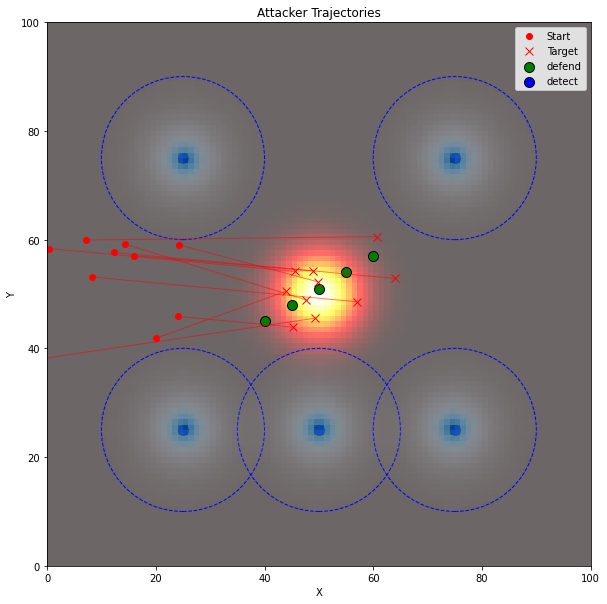

<AxesSubplot:title={'center':'Attacker Trajectories'}, xlabel='X', ylabel='Y'>

In [ ]:
# Example: Attackers sample their targets from the Gaussian distribution
# This creates a realistic scenario where attackers target high-probability areas
from attackers import AttackerSwarm
from interceptors import InterceptorUnit
import interceptor_configs
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 30.0
target = Gaussian(mean, cov)
env3 = Environment(width, height, target)

# Create swarm where targets are sampled from the distribution
# Attackers will naturally target high-probability areas
swarm_sampled = AttackerSwarm(
    start_position=(10.0, 50.0),
    target_distribution=target,  # Sample targets from Gaussian
    number_of_attackers=10,
    spread=15.0,
)

attacker_list = swarm_sampled.generate_swarm(steps=25, speed=1.0)

for attacker in attacker_list:
    attacker.position = attacker.trajectory[0]
    print(len(attacker.trajectory))
    env3.add_atk_drone(attacker)

# Add some interceptors
for i in range(5):
    interceptor = InterceptorUnit(
        type=interceptor_configs.InterceptorType.A,
        position=(40.0 + i * 5.0, 45.0 + i * 3.0)
    )
    env3.add_def_drone(interceptor)

# Add detectors
detector_positions = [(25.0, 75.0), (75.0, 75.0), (50.0, 25.0), (25.0, 25.0), (75.0, 25.0)]
for pos in detector_positions:
    detector = Detector(type=detector_configs.DetectorType.RADAR, position=pos)
    env3.add_detector(detector)

print("Attackers with sampled targets:")
env3.visualize_trajectories(figsize=(12, 10), show_heatmap=True)


47
56
40
55
48
59
57
62
44
46
53
48
Rectangle and triangle detectors with attackers


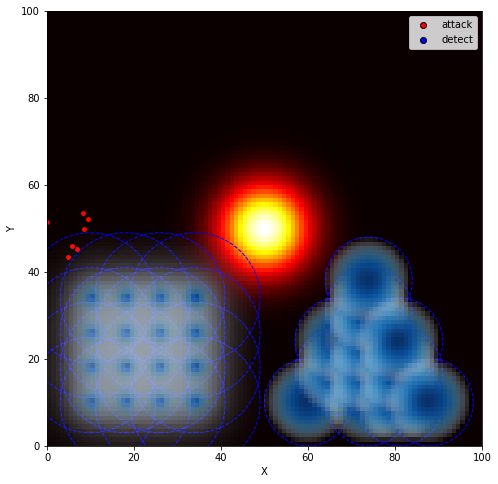

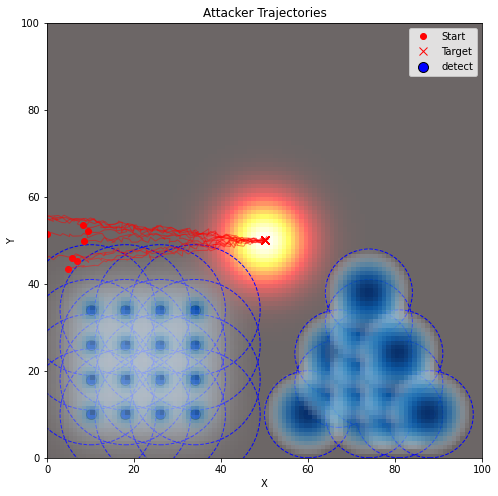

<AxesSubplot:title={'center':'Attacker Trajectories'}, xlabel='X', ylabel='Y'>

In [ ]:
# Demo: rectangle and triangle detector layouts with attackers
from attackers import AttackerSwarm, Attacker
from detectors import Rect_Detectors, Triang_Detectors, Detector
from configs import detector_configs

# Create environment and target
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 50.0
target = Gaussian(mean, cov)
env4 = Environment(width, height, target)

rect_corners = [(10, 10), (40, 10), (40, 40), (10, 40)]
rect_detectors = Rect_Detectors(detector_configs.DetectorType.RADAR, rect_corners, spacing=8)
for d in rect_detectors:
    env4.add_detector(d)

# Triangle detectors: three corner points
tri_corners = [(60, 10), (90, 10), (75, 40)]
tri_detectors = Triang_Detectors(detector_configs.DetectorType.VISUAL, tri_corners, spacing=7)
for d in tri_detectors:
    env4.add_detector(d)

# Create an attacker swarm coming from the left
swarm = AttackerSwarm(start_position=(0.0, 50.0), target_positions=[(50.0, 50.0)], number_of_attackers=12, spread=10.0, noise_std=0.5)
att_list = swarm.generate_swarm(steps=20, speed=1.0, speed_noise=0.2)
for a in att_list:
    a.position = a.trajectory[0]
    print(len(a.trajectory))
    env4.add_atk_drone(a)

print('Rectangle and triangle detectors with attackers')
env4.visualize(figsize=(10, 8))
env4.visualize_trajectories(figsize=(10, 8), show_heatmap=True)

In [ ]:
#boundary for how many we need where it works reasonably well -> not dense
#how long can it fly for a certain density

#chance of detection per xkm flown of shahed, how long are shahed undetected on averge per x 

#Operator amount varies, 5-10 

#TODO: make below better readable, average over multiple trajectories. 

=== Fly-Through Scenario (Detection in NON-OBSERVABLE region only) ===
Number of attackers: 8
Number of detectors in non-observable zone: 7
Target point: (95.0, 50.0)

Individual trajectory analysis:

Attacker 1 (start y=25.0):
  Total flight time: 49s
  Time in non-observable: 31.0s
  Cumulative detection prob (non-obs only): 99.99%
  Detection chance per second: 23.593%
  Detection chance per 10s: 93.22%
  Detection chance per 30s: 99.97%
  Time to 90% detection: 22.0s

Attacker 2 (start y=32.1):
  Total flight time: 49s
  Time in non-observable: 31.0s
  Cumulative detection prob (non-obs only): 99.98%
  Detection chance per second: 22.694%
  Detection chance per 10s: 92.38%
  Detection chance per 30s: 99.96%
  Time to 90% detection: 16.0s

Attacker 3 (start y=39.3):
  Total flight time: 47s
  Time in non-observable: 30.0s
  Cumulative detection prob (non-obs only): 99.90%
  Detection chance per second: 19.786%
  Detection chance per 10s: 88.97%
  Detection chance per 30s: 99.87%
  T

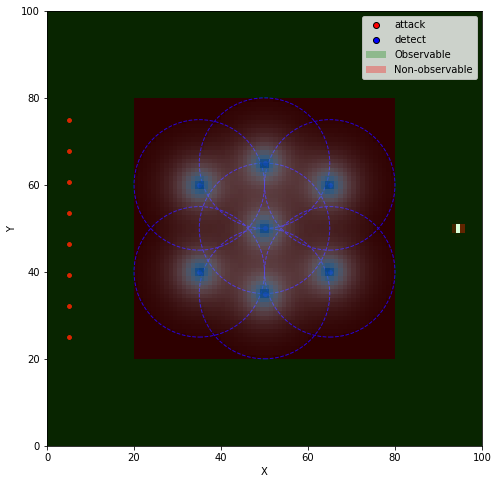

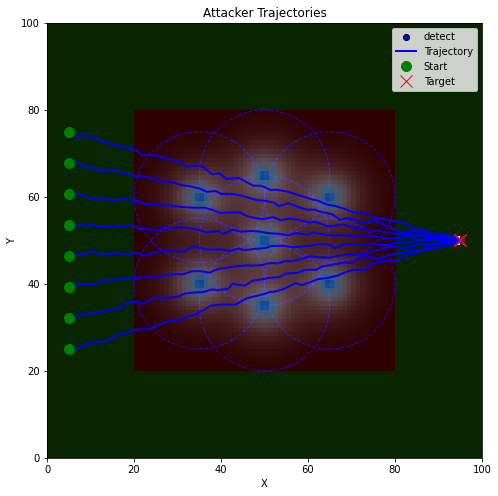


=== Detailed Analysis: Attacker 1 ===


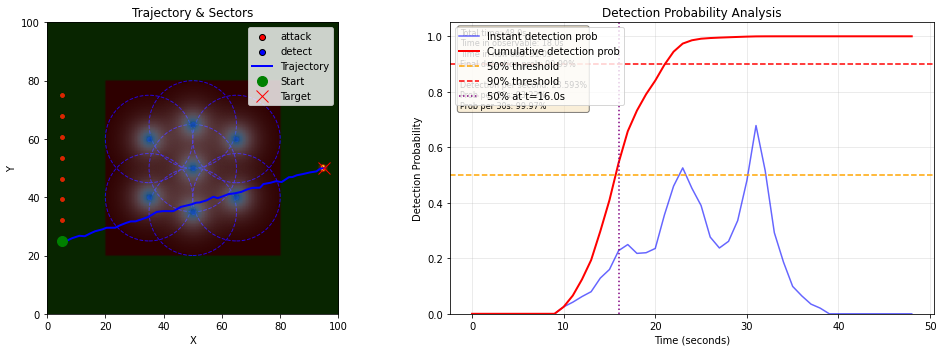

(<Figure size 1008x360 with 2 Axes>,
 (<AxesSubplot:title={'center':'Trajectory & Sectors'}, xlabel='X', ylabel='Y'>,
  <AxesSubplot:title={'center':'Detection Probability Analysis'}, xlabel='Time (seconds)', ylabel='Detection Probability'>))

In [ ]:
# Demo: SectorEnv with fly-through scenario - attackers cross entire grid
from src.env import SectorEnv
from src.attackers import Attacker, AttackerSwarm
from src.detectors import Detector
from configs import detector_configs
from src.targets import PointTarget
import numpy as np

# Create sector environment
width = 100
height = 100

# Use a point target on the opposite side of the grid (right side, middle)
target = PointTarget.at_position(x=95.0, y=50.0, epsilon=0.5)
sector_env = SectorEnv(width, height, target, default_observable=True)

# Define a large non-observable corridor through the middle (this is where detection is uncertain)
# The corridor represents a region without radar/satellite coverage
sector_env.set_rectangular_sector(x0=20, y0=20, w=60, h=60, observable=False)

# Place detector drones strategically in the non-observable region
# Fewer detectors = longer undetected flight time, more detectors = higher detection probability
detector_positions = [
    (35, 40), (35, 60),
    (50, 35), (50, 50), (50, 65),
    (65, 40), (65, 60)
]

for pos in detector_positions:
    det = Detector(type=detector_configs.DetectorType.RADAR, position=pos)
    sector_env.add_detector(det)

# Create multiple attackers starting from left side, all heading to same target point on right
# They fly straight through the non-observable sector
num_attackers = 8
start_y_positions = np.linspace(25, 75, num_attackers)

attackers = []
for y_start in start_y_positions:
    attacker = Attacker(
        start_position=(5.0, y_start),
        target_position=(95.0, 50.0),  # All aim for same point on opposite side
        speed=2.0,  # 2 units per second
        speed_noise=0.15,
        noise_std=0.3
    )
    attacker.position = attacker.trajectory[0]
    sector_env.add_atk_drone(attacker)
    attackers.append(attacker)

# Visualize the sector environment with all attackers
print("=== Fly-Through Scenario (Detection in NON-OBSERVABLE region only) ===")
print(f"Number of attackers: {len(attackers)}")
print(f"Number of detectors in non-observable zone: {len(detector_positions)}")
print(f"Target point: (95.0, 50.0)")
print()

# Analyze each attacker's trajectory
print("Individual trajectory analysis:")
for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(attacker.trajectory, time_per_step=1.0, only_nonobservable=True)
    print(f"\nAttacker {i+1} (start y={start_y_positions[i]:.1f}):")
    print(f"  Total flight time: {len(attacker.trajectory)}s")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection prob (non-obs only): {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection chance per second: {analysis['avg_detection_per_second']:.3%}")
    print(f"  Detection chance per 10s: {analysis['detection_rate_per_interval']['10s']:.2%}")
    print(f"  Detection chance per 30s: {analysis['detection_rate_per_interval']['30s']:.2%}")
    t90 = sector_env.time_until_detection(attacker.trajectory, threshold=0.9)
    print(f"  Time to 90% detection: {t90:.1f}s" if t90 else "  Never reaches 90%")

# Calculate average across all attackers
avg_cumulative = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob'] 
                          for a in attackers])
avg_per_sec = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second'] 
                       for a in attackers])
avg_time_nonobs = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable'] 
                           for a in attackers])

print("\n=== AVERAGE ACROSS ALL ATTACKERS ===")
print(f"Average cumulative detection prob: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.3%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s")

# Visualize the environment
sector_env.visualize(figsize=(10, 8), show_sectors=True)

# Visualize trajectories
sector_env.visualize_trajectories(figsize=(12, 8), show_heatmap=True)

# Detailed analysis for first attacker
print("\n=== Detailed Analysis: Attacker 1 ===")
sector_env.visualize_trajectory_analysis(attackers[0], figsize=(14, 5))

=== SPARSE vs DENSE Detector Coverage Comparison ===
(Detection probabilities calculated for NON-OBSERVABLE region only)

SPARSE Coverage (3 detectors):
  Cumulative detection prob: 100.00%
  Detection per second: 42.502%
  Detection per 10s: 99.61%
  Detection per 30s: 100.00%
  Time to 90% detection: 12.0s
  Time in non-observable: 25.0s

DENSE Coverage (16 detectors):
  Cumulative detection prob: 100.00%
  Detection per second: 39.074%
  Detection per 10s: 99.30%
  Detection per 30s: 100.00%
  Time to 90% detection: 12.0s
  Time in non-observable: 25.0s

=== COMPARISON ===
Sparse detection per second: 42.502%
Dense detection per second: 39.074%
Improvement: 0.9x


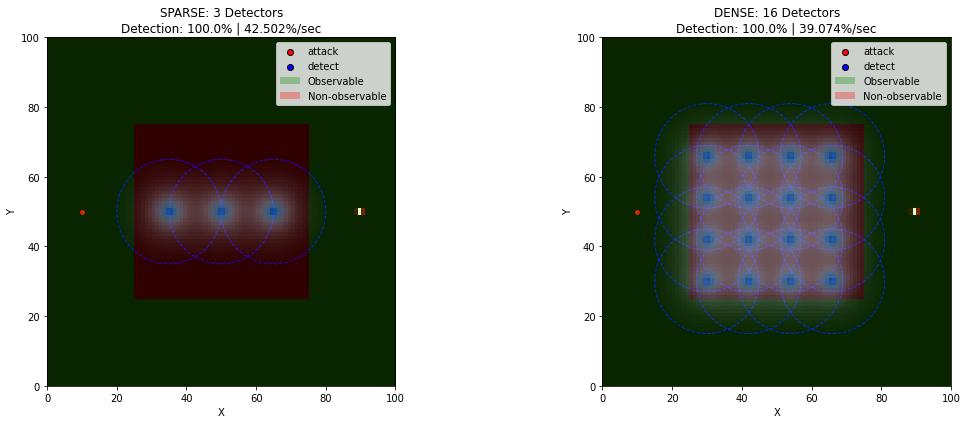


=== Detailed Trajectory Analysis ===


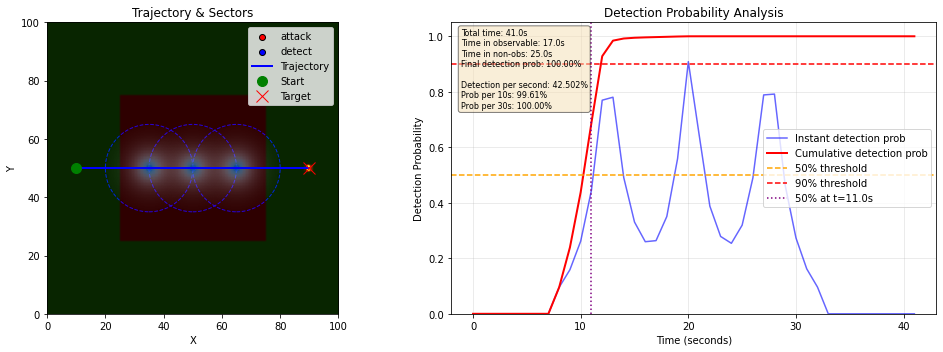

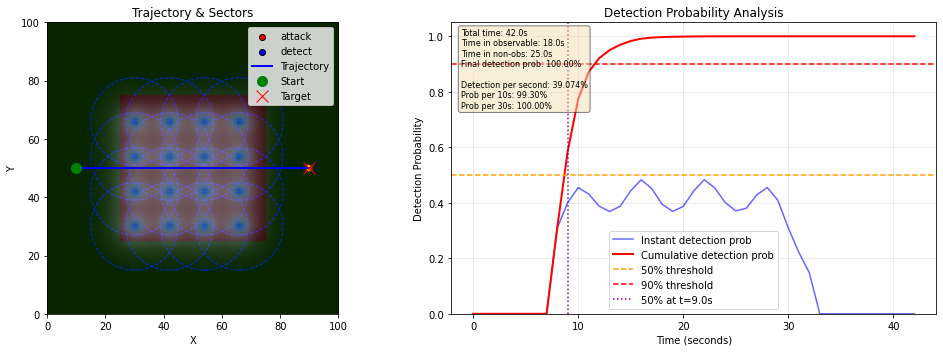

(<Figure size 1008x360 with 2 Axes>,
 (<AxesSubplot:title={'center':'Trajectory & Sectors'}, xlabel='X', ylabel='Y'>,
  <AxesSubplot:title={'center':'Detection Probability Analysis'}, xlabel='Time (seconds)', ylabel='Detection Probability'>))

In [ ]:
# Alternative scenario: Dense detector coverage vs sparse coverage comparison
from src.env import SectorEnv
from src.attackers import Attacker
from src.detectors import Detector, Rect_Detectors
from configs import detector_configs
from src.targets import PointTarget

# Target on opposite side
target = PointTarget.at_position(x=90.0, y=50.0, epsilon=0.5)

# Create two environments for comparison
width, height = 100, 100

# Environment 1: SPARSE detector coverage in non-observable zone
env_sparse = SectorEnv(width, height, target, default_observable=True)
env_sparse.set_rectangular_sector(x0=25, y0=25, w=50, h=50, observable=False)

sparse_positions = [(35, 50), (50, 50), (65, 50)]  # Only 3 detectors
for pos in sparse_positions:
    det = Detector(type=detector_configs.DetectorType.RADAR, position=pos)
    env_sparse.add_detector(det)

# Environment 2: DENSE detector coverage in non-observable zone  
env_dense = SectorEnv(width, height, target, default_observable=True)
env_dense.set_rectangular_sector(x0=25, y0=25, w=50, h=50, observable=False)

# Create a dense grid of detectors
rect_corners = [(30, 30), (70, 30), (70, 70), (30, 70)]
dense_detectors = Rect_Detectors(detector_configs.DetectorType.RADAR, rect_corners, spacing=12)
for det in dense_detectors:
    env_dense.add_detector(det)

# Create same attacker trajectory for both
attacker_sparse = Attacker(
    start_position=(10.0, 50.0),
    target_position=(90.0, 50.0),
    speed=2.0,
    speed_noise=0.1
)

attacker_dense = Attacker(
    start_position=(10.0, 50.0),
    target_position=(90.0, 50.0),
    speed=2.0,
    speed_noise=0.1
)

# Add to environments
attacker_sparse.position = attacker_sparse.trajectory[0]
env_sparse.add_atk_drone(attacker_sparse)

attacker_dense.position = attacker_dense.trajectory[0]
env_dense.add_atk_drone(attacker_dense)

# Compare results (only non-observable region)
print("=== SPARSE vs DENSE Detector Coverage Comparison ===")
print("(Detection probabilities calculated for NON-OBSERVABLE region only)\n")

analysis_sparse = env_sparse.analyze_trajectory(attacker_sparse.trajectory, time_per_step=1.0, only_nonobservable=True)
analysis_dense = env_dense.analyze_trajectory(attacker_dense.trajectory, time_per_step=1.0, only_nonobservable=True)

print(f"SPARSE Coverage ({len(sparse_positions)} detectors):")
print(f"  Cumulative detection prob: {analysis_sparse['cumulative_detection_prob']:.2%}")
print(f"  Detection per second: {analysis_sparse['avg_detection_per_second']:.3%}")
print(f"  Detection per 10s: {analysis_sparse['detection_rate_per_interval']['10s']:.2%}")
print(f"  Detection per 30s: {analysis_sparse['detection_rate_per_interval']['30s']:.2%}")
t90_sparse = env_sparse.time_until_detection(attacker_sparse.trajectory, threshold=0.9)
print(f"  Time to 90% detection: {t90_sparse:.1f}s" if t90_sparse else "  Never reaches 90%")
print(f"  Time in non-observable: {analysis_sparse['time_in_nonobservable']:.1f}s")

print(f"\nDENSE Coverage ({len(list(dense_detectors))} detectors):")
print(f"  Cumulative detection prob: {analysis_dense['cumulative_detection_prob']:.2%}")
print(f"  Detection per second: {analysis_dense['avg_detection_per_second']:.3%}")
print(f"  Detection per 10s: {analysis_dense['detection_rate_per_interval']['10s']:.2%}")
print(f"  Detection per 30s: {analysis_dense['detection_rate_per_interval']['30s']:.2%}")
t90_dense = env_dense.time_until_detection(attacker_dense.trajectory, threshold=0.9)
print(f"  Time to 90% detection: {t90_dense:.1f}s" if t90_dense else "  Never reaches 90%")
print(f"  Time in non-observable: {analysis_dense['time_in_nonobservable']:.1f}s")

# Compare detection rates
print(f"\n=== COMPARISON ===")
print(f"Sparse detection per second: {analysis_sparse['avg_detection_per_second']:.3%}")
print(f"Dense detection per second: {analysis_dense['avg_detection_per_second']:.3%}")
print(f"Improvement: {(analysis_dense['avg_detection_per_second'] / max(analysis_sparse['avg_detection_per_second'], 1e-9)):.1f}x")

# Visualize both
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

env_sparse.visualize(ax=ax1, show=False, show_sectors=True)
ax1.set_title(f'SPARSE: {len(sparse_positions)} Detectors\n'
              f'Detection: {analysis_sparse["cumulative_detection_prob"]:.1%} | '
              f'{analysis_sparse["avg_detection_per_second"]:.3%}/sec')

env_dense.visualize(ax=ax2, show=False, show_sectors=True)
ax2.set_title(f'DENSE: {len(list(dense_detectors))} Detectors\n'
              f'Detection: {analysis_dense["cumulative_detection_prob"]:.1%} | '
              f'{analysis_dense["avg_detection_per_second"]:.3%}/sec')

plt.tight_layout()
plt.show()

# Detailed trajectory analysis comparison
print("\n=== Detailed Trajectory Analysis ===")
env_sparse.visualize_trajectory_analysis(attacker_sparse, figsize=(14, 5))
env_dense.visualize_trajectory_analysis(attacker_dense, figsize=(14, 5))

=== Fly-Through Scenario with 300x300 Non-Observable Region ===
Grid size: 380 x 380
Non-observable corridor: 300 x 300
Number of attackers: 10
Number of detectors: 16
Target point: (375, 190)

Individual trajectory analysis:

Attacker 1 (start y=20.0):
  Total flight time: 416s
  Time in non-observable: 325.0s
  Cumulative detection prob: 100.00%
  Detection per second: 7.121%
  10s detection: 52.23%
  30s detection: 89.10%
  Time to 90% detection: 169.0s

Attacker 2 (start y=57.8):
  Total flight time: 396s
  Time in non-observable: 318.0s
  Cumulative detection prob: 100.00%
  Detection per second: 12.583%
  10s detection: 73.94%
  30s detection: 98.23%
  Time to 90% detection: 95.0s

Attacker 3 (start y=95.6):
  Total flight time: 376s
  Time in non-observable: 301.0s
  Cumulative detection prob: 100.00%
  Detection per second: 9.060%
  10s detection: 61.31%
  30s detection: 94.21%
  Time to 90% detection: 212.0s

Attacker 4 (start y=133.3):
  Total flight time: 374s
  Time in non-

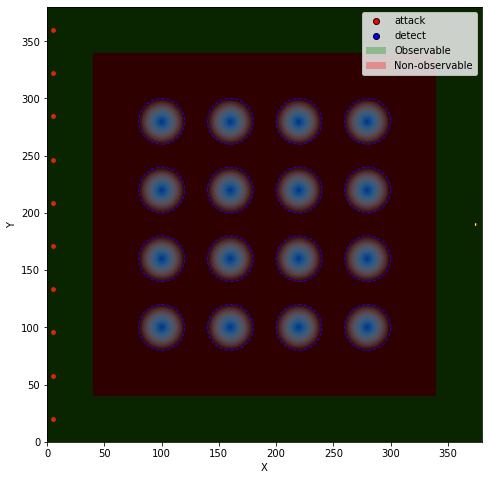

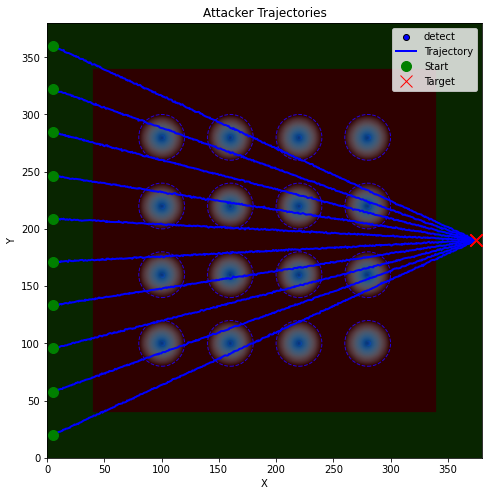


=== Detailed Analysis: Attacker 1 ===


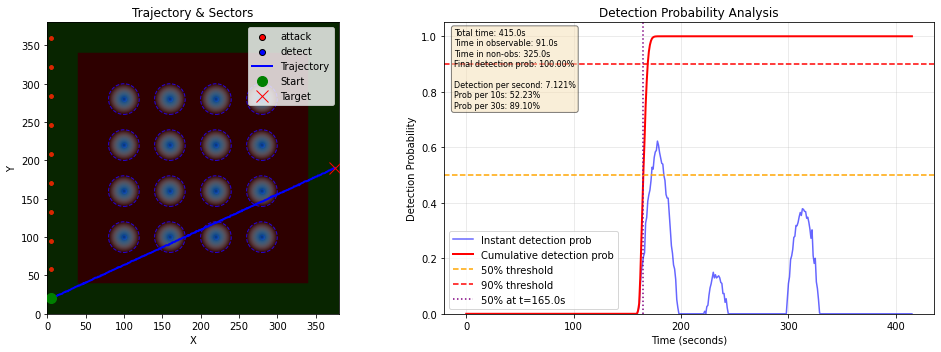

(<Figure size 1008x360 with 2 Axes>,
 (<AxesSubplot:title={'center':'Trajectory & Sectors'}, xlabel='X', ylabel='Y'>,
  <AxesSubplot:title={'center':'Detection Probability Analysis'}, xlabel='Time (seconds)', ylabel='Detection Probability'>))

In [ ]:
# Modified Demo: SectorEnv with larger non-observable region (~300x300 timesteps)
# and slightly larger overall grid

from src.env import SectorEnv
from src.attackers import Attacker, AttackerSwarm
from src.detectors import Detector
from configs import detector_configs
from src.targets import PointTarget
import numpy as np

##############################################
# GRID SIZE
##############################################
# Non-observable region should correspond to ~300x300 timesteps.
# In your simulation, 1 unit ~ 1 timestep movement (based on your attacker speed).
# We'll define a corridor of size 300x300, and the outer grid slightly larger.

nonobs_width = 300
nonobs_height = 300

# Outer grid just moderately bigger
margin = 80
width = nonobs_width + margin
height = nonobs_height + margin

##############################################
# SECTOR ENV SETUP
##############################################

# Target on the far-right middle
# Using the new grid dimensions
# Place target near right boundary
cx = width - 5
cy = height // 2

target = PointTarget.at_position(x=cx, y=cy, epsilon=0.5)
sector_env = SectorEnv(width, height, target, default_observable=True)

##############################################
# NON-OBSERVABLE REGION
##############################################
# Center the 300x300 corridor inside the grid

x0 = (width - nonobs_width) // 2
y0 = (height - nonobs_height) // 2

sector_env.set_rectangular_sector(
    x0=x0,
    y0=y0,
    w=nonobs_width,
    h=nonobs_height,
    observable=False
)

##############################################
# DETECTORS INSIDE THE NON-OBSERVABLE REGION
##############################################
# Position them roughly evenly inside the corridor

num_detectors_x = 4
num_detectors_y = 4

detector_positions = []
for i in range(num_detectors_x):
    for j in range(num_detectors_y):
        px = x0 + (i + 1) * nonobs_width / (num_detectors_x + 1)
        py = y0 + (j + 1) * nonobs_height / (num_detectors_y + 1)
        detector_positions.append((px, py))

for pos in detector_positions:
    det = Detector(type=detector_configs.DetectorType.ACOUSTIC, position=pos)
    sector_env.add_detector(det)

##############################################
# ATTACKERS — Now across the left border
##############################################
# They fly straight across toward the target

num_attackers = 10
start_y_positions = np.linspace(20, height - 20, num_attackers)

attackers = []

for y_start in start_y_positions:
    attacker = Attacker(
        start_position=(5.0, y_start),
        target_position=(cx, cy),
        speed=1.0,
        speed_noise=0.15,
        noise_std=0.3
    )
    attacker.position = attacker.trajectory[0]
    sector_env.add_atk_drone(attacker)
    attackers.append(attacker)

print("=== Fly-Through Scenario with 300x300 Non-Observable Region ===")
print(f"Grid size: {width} x {height}")
print(f"Non-observable corridor: {nonobs_width} x {nonobs_height}")
print(f"Number of attackers: {len(attackers)}")
print(f"Number of detectors: {len(detector_positions)}")
print(f"Target point: ({cx}, {cy})")

print("\nIndividual trajectory analysis:")
for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(attacker.trajectory, time_per_step=1.0, only_nonobservable=True)
    print(f"\nAttacker {i+1} (start y={start_y_positions[i]:.1f}):")
    print(f"  Total flight time: {len(attacker.trajectory)}s")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection prob: {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection per second: {analysis['avg_detection_per_second']:.3%}")
    print(f"  10s detection: {analysis['detection_rate_per_interval']['10s']:.2%}")
    print(f"  30s detection: {analysis['detection_rate_per_interval']['30s']:.2%}")
    t90 = sector_env.time_until_detection(attacker.trajectory, threshold=0.9)
    print(f"  Time to 90% detection: {t90:.1f}s" if t90 else "  Never reaches 90%")

avg_cumulative = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob']
    for a in attackers
])
avg_per_sec = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second']
    for a in attackers
])
avg_time_nonobs = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable']
    for a in attackers
])

print("\n=== AVERAGE ACROSS ALL ATTACKERS ===")
print(f"Average cumulative detection prob: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.3%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s")

# Visualizations
sector_env.visualize(figsize=(10, 8), show_sectors=True)
sector_env.visualize_trajectories(figsize=(12, 8), show_heatmap=True)

print("\n=== Detailed Analysis: Attacker 1 ===")
sector_env.visualize_trajectory_analysis(attackers[0], figsize=(14, 5))


## TODO: 
- [ ] Build more realistic scenario, not just grid detector/undetectable 
- [ ] implement interceptor 
- [ ] build more robust statistical analysis, 
    - [ ] assume attackers from every angle, average over everything
    - [ ] do multiple runs of this with different configurations to find ~optimal number of detectors for given scenario

=== Fly-Through Scenario with 300x300 Non-Observable Region ===
Grid size: 380 x 380
Non-observable corridor: 300 x 300
Number of attackers: 10
Number of detectors: 25
Target point: (375, 190)

Individual trajectory analysis:

Attacker 1 (start y=20.0):
  Total flight time: 406s
  Time in non-observable: 319.0s
  Cumulative detection prob: 100.00%
  Detection per second: 9.248%
  10s detection: 62.11%
  30s detection: 94.56%

Attacker 1 (start y=20.0):
  Total flight time: 406s
  Time in non-observable: 319.0s
  Cumulative detection prob: 100.00%
  Detection per second: 9.248%
  10s detection: 62.11%
  30s detection: 94.56%
  Time to 90% detection: 49.0s
  Time to 90% detection: 49.0s

Attacker 2 (start y=57.8):
  Total flight time: 400s
  Time in non-observable: 322.0s
  Cumulative detection prob: 100.00%
  Detection per second: 9.924%
  10s detection: 64.83%
  30s detection: 95.65%

Attacker 2 (start y=57.8):
  Total flight time: 400s
  Time in non-observable: 322.0s
  Cumulative det

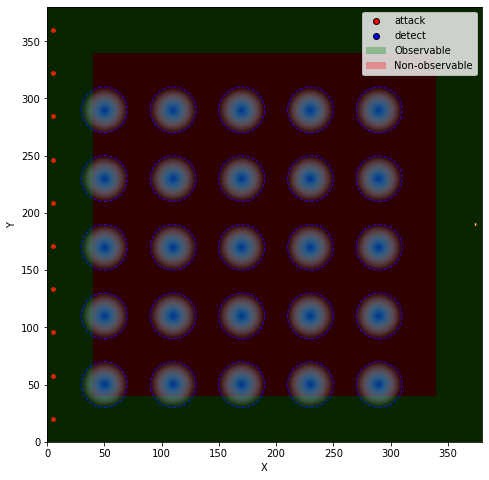

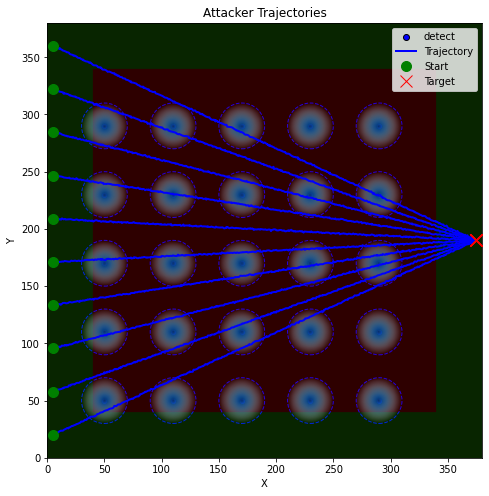


=== Detailed Analysis: Attacker 1 ===


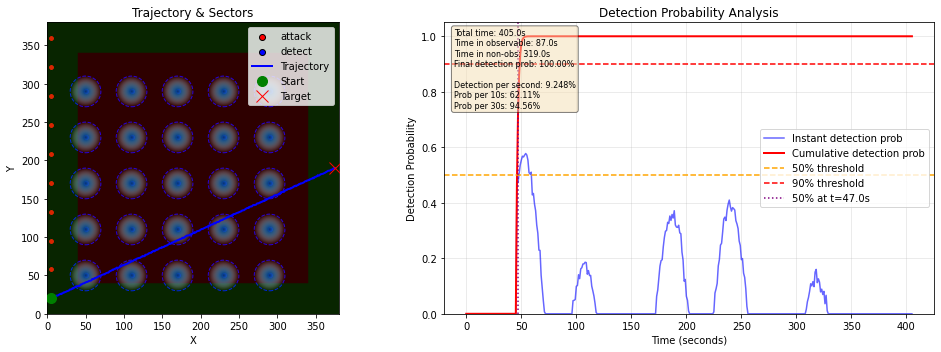


=== Triangle non-observable sector example ===


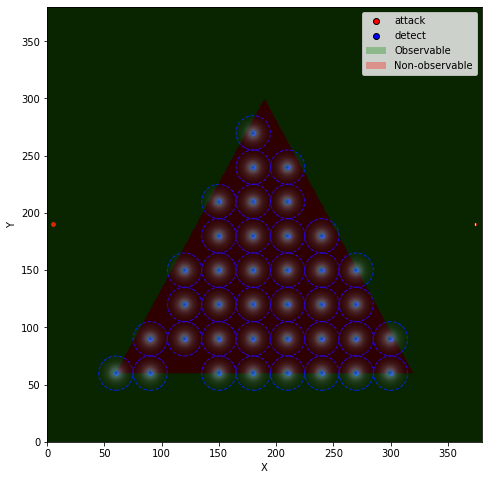

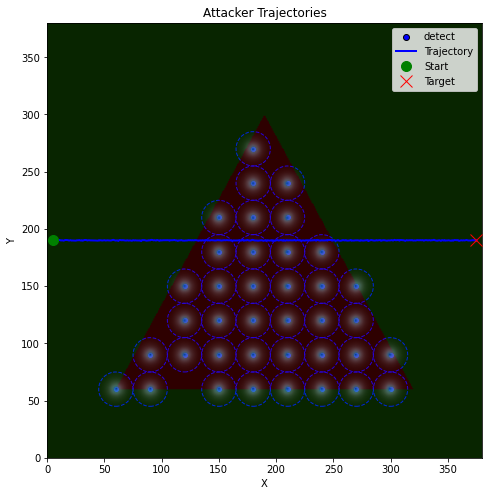

Triangle example: detailed analysis for the single attacker
Time in non-observable (triangle): 118.0s
Cumulative detection prob (triangle): 98.47%


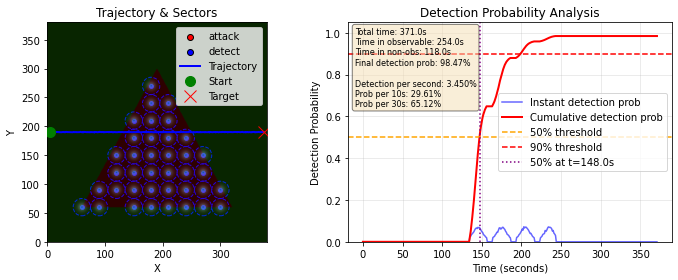

=== Fly-Through Scenario (Detection in NON-OBSERVABLE region only) ===
Number of attackers: 11


NameError: name 'detector_positions' is not defined

In [ ]:
# and slightly larger overall grid. This version uses the detector-grid helpers
# in `src.detectors` (Rect_Detectors / Triang_Detectors) rather than building the grid manually.

from src.env import SectorEnv
from src.attackers import Attacker, AttackerSwarm
from src.detectors import Detector, Rect_Detectors, Triang_Detectors, set_nonobservable_triangle
from configs import detector_configs
from src.targets import PointTarget
import numpy as np

##############################################
# GRID SIZE
##############################################
# Non-observable region should correspond to ~300x300 timesteps.
# We'll define a corridor of size 300x300, and the outer grid slightly larger.

nonobs_width = 300
nonobs_height = 300

# Outer grid just moderately bigger
margin = 80
width = nonobs_width + margin
height = nonobs_height + margin

##############################################
# SECTOR ENV SETUP
##############################################

# Target on the far-right middle (using the new grid dimensions)
cx = width - 5
cy = height // 2

target = PointTarget.at_position(x=cx, y=cy, epsilon=0.5)
sector_env = SectorEnv(width, height, target, default_observable=True)

# Center the 300x300 corridor inside the grid
x0 = (width - nonobs_width) // 2
y0 = (height - nonobs_height) // 2
sector_env.set_rectangular_sector(x0=x0, y0=y0, w=nonobs_width, h=nonobs_height, observable=False)

##############################################
# DETECTORS INSIDE THE NON-OBSERVABLE REGION (use helper)
##############################################
# Instead of building detector_positions manually, use Rect_Detectors and place the
# detector grid slightly inset from the corridor boundary (so it is 'closer to the boundary').

inset = 10  # move the detector grid a bit closer to the non-observable boundary
num_detectors_x = 4
# Build rectangle corners inset from the corridor edges
rect_corners = [
    (x0 + inset, y0 + inset),
    (x0 + nonobs_width - inset, y0 + inset),
    (x0 + nonobs_width - inset, y0 + nonobs_height - inset),
    (x0 + inset, y0 + nonobs_height - inset),
]
spacing = nonobs_width / (num_detectors_x + 1)
acoustic_detectors = Rect_Detectors(detector_configs.DetectorType.ACOUSTIC, rect_corners, spacing=spacing)
for d in acoustic_detectors:
    sector_env.add_detector(d)

##############################################
# ATTACKERS — Now across the left border
##############################################
# They fly straight across toward the target

num_attackers = 10
start_y_positions = np.linspace(20, height - 20, num_attackers)

attackers = []
for y_start in start_y_positions:
    attacker = Attacker(
        start_position=(5.0, y_start),
        target_position=(cx, cy),
        speed=1.0,
        speed_noise=0.15,
        noise_std=0.3
    )
    attacker.position = attacker.trajectory[0]
    sector_env.add_atk_drone(attacker)
    attackers.append(attacker)

print("=== Fly-Through Scenario with 300x300 Non-Observable Region ===")
print(f"Grid size: {width} x {height}")
print(f"Non-observable corridor: {nonobs_width} x {nonobs_height}")
print(f"Number of attackers: {len(attackers)}")
print(f"Number of detectors: {len(acoustic_detectors)}")
print(f"Target point: ({cx}, {cy})")

print("\nIndividual trajectory analysis:")
for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(attacker.trajectory, time_per_step=1.0, only_nonobservable=True)
    print(f"\nAttacker {i+1} (start y={start_y_positions[i]:.1f}):")
    print(f"  Total flight time: {len(attacker.trajectory)}s")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection prob: {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection per second: {analysis['avg_detection_per_second']:.3%}")
    print(f"  10s detection: {analysis['detection_rate_per_interval']['10s']:.2%}")
    print(f"  30s detection: {analysis['detection_rate_per_interval']['30s']:.2%}")
    t90 = sector_env.time_until_detection(attacker.trajectory, threshold=0.9)
    print(f"  Time to 90% detection: {t90:.1f}s" if t90 else "  Never reaches 90%")

avg_cumulative = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob']
    for a in attackers
])
avg_per_sec = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second']
    for a in attackers
])
avg_time_nonobs = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable']
    for a in attackers
])

print("\n=== AVERAGE ACROSS ALL ATTACKERS ===")
print(f"Average cumulative detection prob: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.3%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s")

# Visualizations
sector_env.visualize(figsize=(10, 8), show_sectors=True)
sector_env.visualize_trajectories(figsize=(12, 8), show_heatmap=True)

print("\n=== Detailed Analysis: Attacker 1 ===")
sector_env.visualize_trajectory_analysis(attackers[0], figsize=(14, 5))

# ------------------------------------------------------------------
# Additional example: create a NON-OBSERVABLE TRIANGLE and place detectors inside it
# ------------------------------------------------------------------
print("\n=== Triangle non-observable sector example ===")
# Create a fresh environment for the triangle example
tri_env = SectorEnv(width, height, target, default_observable=True)
# Define triangle corners (inside the previous corridor bounds but shifted toward boundary)
tri_corners = [
    (x0 + 20, y0 + 20),
    (x0 + nonobs_width - 20, y0 + 20),
    (x0 + nonobs_width/2, y0 + nonobs_height - 40),
]
# Mark the triangle as non-observable using helper
set_nonobservable_triangle(tri_env, tri_corners)
# Place detectors inside the triangle using the Triang_Detectors helper
tri_detectors = Triang_Detectors(detector_configs.DetectorType.RADAR, tri_corners, spacing=30)
for d in tri_detectors:
    tri_env.add_detector(d)

# Add a single attacker crossing the triangle region
att_tri = Attacker(start_position=(5.0, cy), target_position=(cx, cy), speed=1.0, noise_std=0.2)
att_tri.position = att_tri.trajectory[0]
tri_env.add_atk_drone(att_tri)

# Visualize triangle environment and perform analysis
tri_env.visualize(figsize=(8, 8), show_sectors=True)
tri_env.visualize_trajectories(figsize=(8, 8), show_heatmap=False)
print("Triangle example: detailed analysis for the single attacker")
analysis_tri = tri_env.analyze_trajectory(att_tri.trajectory, time_per_step=1.0, only_nonobservable=True)
print(f"Time in non-observable (triangle): {analysis_tri['time_in_nonobservable']:.1f}s")
print(f"Cumulative detection prob (triangle): {analysis_tri['cumulative_detection_prob']:.2%}")
tri_env.visualize_trajectory_analysis(att_tri, figsize=(10, 4))

attacker = Attacker(
    start_position=(5.0, y_start),
    target_position=(95.0, 50.0),  # All aim for same point on opposite side
    speed=2.0,  # 2 units per second
    speed_noise=0.15,
    noise_std=0.3
)
attacker.position = attacker.trajectory[0]
sector_env.add_atk_drone(attacker)
attackers.append(attacker)

# Visualize the sector environment with all attackers
print("=== Fly-Through Scenario (Detection in NON-OBSERVABLE region only) ===")
print(f"Number of attackers: {len(attackers)}")
print(f"Number of detectors in non-observable zone: {len(detector_positions)}")
print(f"Target point: (95.0, 50.0)")
print()

# Analyze each attacker's trajectory
print("Individual trajectory analysis:")
for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(attacker.trajectory, time_per_step=1.0, only_nonobservable=True)
    print(f"\nAttacker {i+1} (start y={start_y_positions[i]:.1f}):")
    print(f"  Total flight time: {len(attacker.trajectory)}s")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection prob (non-obs only): {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection chance per second: {analysis['avg_detection_per_second']:.3%}")
    print(f"  Detection chance per 10s: {analysis['detection_rate_per_interval']['10s']:.2%}")
    print(f"  Detection chance per 30s: {analysis['detection_rate_per_interval']['30s']:.2%}")
    t90 = sector_env.time_until_detection(attacker.trajectory, threshold=0.9)
    print(f"  Time to 90% detection: {t90:.1f}s" if t90 else "  Never reaches 90%")

# Calculate average across all attackers
avg_cumulative = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob'] 
                          for a in attackers])
avg_per_sec = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second'] 
                       for a in attackers])
avg_time_nonobs = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable'] 
                           for a in attackers])

print("\n=== AVERAGE ACROSS ALL ATTACKERS ===")
print(f"Average cumulative detection prob: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.3%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s")

# Visualize the environment
sector_env.visualize(figsize=(10, 8), show_sectors=True)

# Visualize trajectories
sector_env.visualize_trajectories(figsize=(12, 8), show_heatmap=True)

# Detailed analysis for first attacker
print("\n=== Detailed Analysis: Attacker 1 ===")
sector_env.visualize_trajectory_analysis(attackers[0], figsize=(14, 5))

In [ ]:
# Complete Visualization Example: Grid-Independent Detection System
# This example shows a realistic scenario with physical coordinates and configurable cell size

import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'configs'))

import numpy as np
import matplotlib.pyplot as plt
from src.env import SectorEnv
from src.attackers import Attacker
from src.detectors import Detector, Rect_Detectors
from configs import detector_configs
from src.targets import PointTarget

# ============================================================================
# PHYSICAL SCENARIO DEFINITION (all in meters)
# ============================================================================
physical_width = 500.0   # 500 meters
physical_height = 500.0  # 500 meters
cell_size = 10.0         # Each grid cell represents 10m × 10m

# Calculate grid dimensions (number of cells)
width_cells = int(physical_width / cell_size)   # 50 cells
height_cells = int(physical_height / cell_size)  # 50 cells

print(f"Physical area: {physical_width}m × {physical_height}m")
print(f"Grid: {width_cells} × {height_cells} cells")
print(f"Cell size: {cell_size}m per cell")

# ============================================================================
# CREATE ENVIRONMENT
# ============================================================================
target = PointTarget.at_position(x=450.0, y=250.0, epsilon=0.5)  # Target at 450m, 250m
sector_env = SectorEnv(width_cells, height_cells, target, 
                      default_observable=True, cell_size=cell_size)

# ============================================================================
# DEFINE NON-OBSERVABLE REGION (in physical coordinates, then convert to cells)
# ============================================================================
# Physical region: 150m-350m in x, 150m-350m in y (a 200m × 200m corridor)
nonobs_x0_phys = 150.0
nonobs_y0_phys = 150.0
nonobs_width_phys = 200.0
nonobs_height_phys = 200.0

# Convert to grid cells
nonobs_x0_cells = int(nonobs_x0_phys / cell_size)
nonobs_y0_cells = int(nonobs_y0_phys / cell_size)
nonobs_w_cells = int(nonobs_width_phys / cell_size)
nonobs_h_cells = int(nonobs_height_phys / cell_size)

sector_env.set_rectangular_sector(
    x0=nonobs_x0_cells,
    y0=nonobs_y0_cells,
    w=nonobs_w_cells,
    h=nonobs_h_cells,
    observable=False
)

print(f"\nNon-observable region:")
print(f"  Physical: {nonobs_x0_phys}m-{nonobs_x0_phys+nonobs_width_phys}m × "
      f"{nonobs_y0_phys}m-{nonobs_y0_phys+nonobs_height_phys}m")
print(f"  Grid cells: [{nonobs_x0_cells}, {nonobs_x0_cells+nonobs_w_cells}) × "
      f"[{nonobs_y0_cells}, {nonobs_y0_cells+nonobs_h_cells})")

# ============================================================================
# PLACE DETECTORS (in physical coordinates - meters)
# ============================================================================
# Use Rect_Detectors helper to create a grid inside the non-observable region
detector_corners = [
    (nonobs_x0_phys + 20, nonobs_y0_phys + 20),
    (nonobs_x0_phys + nonobs_width_phys - 20, nonobs_y0_phys + 20),
    (nonobs_x0_phys + nonobs_width_phys - 20, nonobs_y0_phys + nonobs_height_phys - 20),
    (nonobs_x0_phys + 20, nonobs_y0_phys + nonobs_height_phys - 20),
]

detector_spacing = 50.0  # 50 meters between detectors
detectors = Rect_Detectors(detector_configs.DetectorType.ACOUSTIC, detector_corners, spacing=detector_spacing)

for det in detectors:
    sector_env.add_detector(det)

print(f"\nDetectors: {len(detectors)} units placed at {detector_spacing}m spacing")

# ============================================================================
# CREATE ATTACKERS (in physical coordinates - meters)
# ============================================================================
num_attackers = 5
start_y_positions = np.linspace(180.0, 320.0, num_attackers)  # Physical positions in meters

attackers = []
for i, y_start in enumerate(start_y_positions):
    attacker = Attacker(
        start_position=(50.0, y_start),      # Start at 50m from left
        target_position=(450.0, 250.0),      # Target at 450m, 250m
        speed=2.0,                            # 2 meters per second
        speed_noise=0.1,
        noise_std=0.3
    )
    attacker.position = attacker.trajectory[0]
    sector_env.add_atk_drone(attacker)
    attackers.append(attacker)

print(f"\nAttackers: {num_attackers} drones")
print(f"  Speed: 2.0 m/s")
print(f"  Start positions: 50m from left edge, spread vertically")

# ============================================================================
# ANALYZE TRAJECTORIES
# ============================================================================
print("\n" + "="*70)
print("TRAJECTORY ANALYSIS")
print("="*70)

for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(
        attacker.trajectory,
        time_per_step=1.0,
        only_nonobservable=True
    )
    
    print(f"\nAttacker {i+1}:")
    print(f"  Total flight time: {len(attacker.trajectory)}s")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection prob: {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection per second: {analysis['avg_detection_per_second']:.4%}")

# Calculate averages
avg_cumulative = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob']
    for a in attackers
])
avg_per_sec = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second']
    for a in attackers
])
avg_time_nonobs = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable']
    for a in attackers
])

print(f"\n{'='*70}")
print("AVERAGE STATISTICS")
print(f"{'='*70}")
print(f"Average cumulative detection: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.4%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print(f"\n{'='*70}")
print("GENERATING VISUALIZATIONS")
print(f"{'='*70}\n")

# Create figure with multiple views
fig = plt.figure(figsize=(18, 6))

# Plot 1: Overview with sectors
ax1 = fig.add_subplot(1, 3, 1)
sector_env.visualize(ax=ax1, show=False, show_sectors=True)
ax1.set_title(f'Environment Overview\n{width_cells}×{height_cells} cells @ {cell_size}m/cell\n'
              f'Physical: {physical_width}m × {physical_height}m', fontsize=10)
ax1.set_xlabel('X position (meters)')
ax1.set_ylabel('Y position (meters)')

# Plot 2: Trajectories
ax2 = fig.add_subplot(1, 3, 2)
sector_env.visualize_trajectories(ax=ax2, show=False, show_heatmap=False)
ax2.set_title(f'Attacker Trajectories\n{num_attackers} drones @ 2.0 m/s\n'
              f'{len(detectors)} detectors @ {detector_spacing}m spacing', fontsize=10)
ax2.set_xlabel('X position (meters)')
ax2.set_ylabel('Y position (meters)')

# Plot 3: Detailed analysis for first attacker
ax3 = fig.add_subplot(1, 3, 3)
times = [entry['time'] for entry in sector_env.analyze_trajectory(attackers[0].trajectory, only_nonobservable=True)['time_to_detection']]
cumulative_probs = [entry['cumulative_prob'] for entry in sector_env.analyze_trajectory(attackers[0].trajectory, only_nonobservable=True)['time_to_detection']]

ax3.plot(times, cumulative_probs, 'r-', linewidth=2, label='Cumulative detection')
ax3.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='50% threshold')
ax3.axhline(y=0.9, color='red', linestyle='--', alpha=0.7, label='90% threshold')
ax3.fill_between(times, 0, cumulative_probs, alpha=0.2, color='red')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Cumulative Detection Probability')
ax3.set_title(f'Detection Analysis: Attacker 1\nFinal: {cumulative_probs[-1]:.2%}', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='lower right')
ax3.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("✓ Visualizations complete!")
print(f"\nNote: All coordinates shown are in physical meters.")
print(f"Detection statistics are independent of grid resolution (cell_size={cell_size}m).")

# Waypoint Example

This example demonstrates attackers flying through a waypoint (mid-point) before reaching their target. This creates more realistic flight paths, such as drones avoiding detection zones or following terrain/navigation routes.

=== Creating Attackers WITHOUT Waypoints (Direct Path) ===
Direct path trajectory points: 162

=== Creating Attackers WITH Waypoints (Detour Path) ===
Waypoint path trajectory points: 196
Waypoint location: (5000.0, 1500.0)

TRAJECTORY ANALYSIS

Direct Path:
  Total flight time: 162s (2.7 min)
  Time in non-observable: 80.0s
  Cumulative detection prob: 0.00%
  Detection per second: 0.0000%

Waypoint Path:
  Total flight time: 196s (3.3 min)
  Time in non-observable: 7.0s
  Cumulative detection prob: 0.00%
  Detection per second: 0.0000%

VISUALIZATIONS


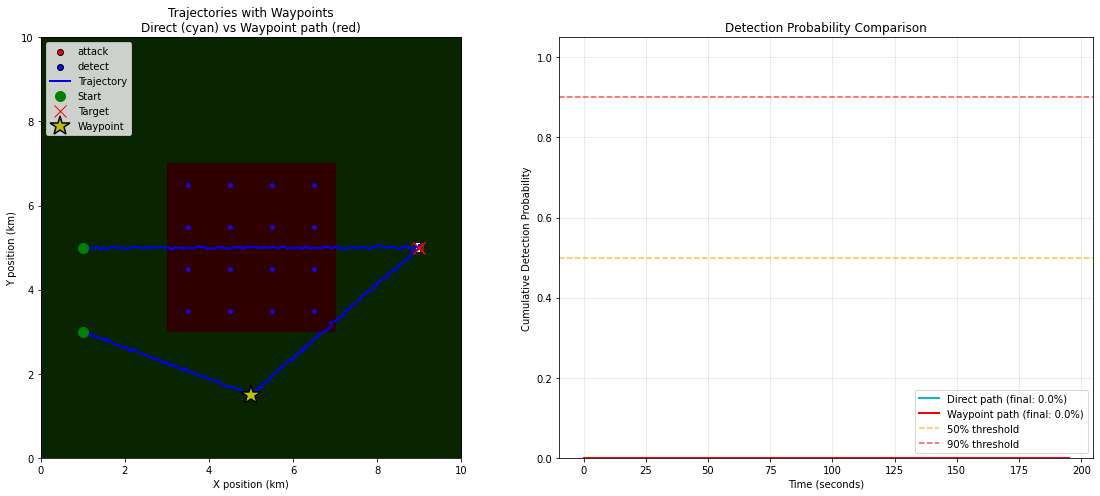


✓ Waypoint example complete!

Comparison:
  Direct path: 162s flight, 0.00% detection
  Waypoint path: 196s flight, 0.00% detection
  Time difference: 34s longer for waypoint path


In [ ]:
# Example: Attackers with waypoints
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'configs'))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from src.env import SectorEnv
from src.attackers import Attacker
from src.detectors import Detector, Rect_Detectors
from configs import detector_configs
from src.targets import PointTarget

# Create environment
physical_width = 10000.0   # 10 km
physical_height = 10000.0  # 10 km
cell_size = 100.0

width_cells = int(physical_width / cell_size)
height_cells = int(physical_height / cell_size)

target = PointTarget.at_position(x=9000.0, y=5000.0, epsilon=50.0)
sector_env = SectorEnv(width_cells, height_cells, target, 
                      default_observable=True, cell_size=cell_size)

# Non-observable region in the center
nonobs_x0 = 30  # cells
nonobs_y0 = 30
nonobs_w = 40
nonobs_h = 40
sector_env.set_rectangular_sector(x0=nonobs_x0, y0=nonobs_y0, w=nonobs_w, h=nonobs_h, observable=False)

# Place detectors
detector_corners = [
    (3500.0, 3500.0),
    (6500.0, 3500.0),
    (6500.0, 6500.0),
    (3500.0, 6500.0),
]
detectors = Rect_Detectors(detector_configs.DetectorType.RADAR, detector_corners, spacing=1000.0)
for det in detectors:
    sector_env.add_detector(det)

# Create attackers WITHOUT waypoint (direct path)
print("=== Creating Attackers WITHOUT Waypoints (Direct Path) ===")
attacker_direct = Attacker(
    start_position=(1000.0, 5000.0),
    target_position=(9000.0, 5000.0),
    speed=50.0,
    noise_std=20.0
)
attacker_direct.position = attacker_direct.trajectory[0]
sector_env.add_atk_drone(attacker_direct)

print(f"Direct path trajectory points: {len(attacker_direct.trajectory)}")

# Create attackers WITH waypoint (detour through waypoint)
print("\n=== Creating Attackers WITH Waypoints (Detour Path) ===")
attacker_waypoint = Attacker(
    start_position=(1000.0, 3000.0),
    target_position=(9000.0, 5000.0),
    waypoint=(5000.0, 1500.0),  # Waypoint south of the non-observable region
    speed=50.0,
    noise_std=20.0
)
attacker_waypoint.position = attacker_waypoint.trajectory[0]
sector_env.add_atk_drone(attacker_waypoint)

print(f"Waypoint path trajectory points: {len(attacker_waypoint.trajectory)}")
print(f"Waypoint location: {attacker_waypoint.waypoint}")

# Analyze trajectories
print("\n" + "="*70)
print("TRAJECTORY ANALYSIS")
print("="*70)

analysis_direct = sector_env.analyze_trajectory(attacker_direct.trajectory, time_per_step=1.0, only_nonobservable=True)
print(f"\nDirect Path:")
print(f"  Total flight time: {len(attacker_direct.trajectory)}s ({len(attacker_direct.trajectory)/60:.1f} min)")
print(f"  Time in non-observable: {analysis_direct['time_in_nonobservable']:.1f}s")
print(f"  Cumulative detection prob: {analysis_direct['cumulative_detection_prob']:.2%}")
print(f"  Detection per second: {analysis_direct['avg_detection_per_second']:.4%}")

analysis_waypoint = sector_env.analyze_trajectory(attacker_waypoint.trajectory, time_per_step=1.0, only_nonobservable=True)
print(f"\nWaypoint Path:")
print(f"  Total flight time: {len(attacker_waypoint.trajectory)}s ({len(attacker_waypoint.trajectory)/60:.1f} min)")
print(f"  Time in non-observable: {analysis_waypoint['time_in_nonobservable']:.1f}s")
print(f"  Cumulative detection prob: {analysis_waypoint['cumulative_detection_prob']:.2%}")
print(f"  Detection per second: {analysis_waypoint['avg_detection_per_second']:.4%}")

# Visualize
print("\n" + "="*70)
print("VISUALIZATIONS")
print("="*70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Environment with trajectories (use visualize_trajectories to show paths)
sector_env.visualize_trajectories(ax=ax1, show=False, show_heatmap=False)
ax1.set_title(f'Trajectories with Waypoints\nDirect (cyan) vs Waypoint path (red)', fontsize=12)
ax1.set_xlabel('X position (km)')
ax1.set_ylabel('Y position (km)')

# Use FuncFormatter to convert meters to km (avoids FixedFormatter warning)
km_formatter = FuncFormatter(lambda x, pos: f'{x/1000:.0f}')
ax1.xaxis.set_major_formatter(km_formatter)
ax1.yaxis.set_major_formatter(km_formatter)

# Highlight the waypoint on top of the trajectories
ax1.plot(attacker_waypoint.waypoint[0], attacker_waypoint.waypoint[1], 
         'y*', markersize=20, label='Waypoint', zorder=10, markeredgecolor='black', markeredgewidth=1.5)
ax1.legend(loc='upper left')

# Plot 2: Detection probability comparison
ax2.plot(
    [entry['time'] for entry in analysis_direct['time_to_detection']],
    [entry['cumulative_prob'] for entry in analysis_direct['time_to_detection']],
    'c-', linewidth=2, label=f'Direct path (final: {analysis_direct["cumulative_detection_prob"]:.1%})'
)
ax2.plot(
    [entry['time'] for entry in analysis_waypoint['time_to_detection']],
    [entry['cumulative_prob'] for entry in analysis_waypoint['time_to_detection']],
    'r-', linewidth=2, label=f'Waypoint path (final: {analysis_waypoint["cumulative_detection_prob"]:.1%})'
)
ax2.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='50% threshold')
ax2.axhline(y=0.9, color='red', linestyle='--', alpha=0.7, label='90% threshold')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Cumulative Detection Probability')
ax2.set_title('Detection Probability Comparison', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='lower right')
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("\n✓ Waypoint example complete!")
print(f"\nComparison:")
print(f"  Direct path: {len(attacker_direct.trajectory)}s flight, {analysis_direct['cumulative_detection_prob']:.2%} detection")
print(f"  Waypoint path: {len(attacker_waypoint.trajectory)}s flight, {analysis_waypoint['cumulative_detection_prob']:.2%} detection")
print(f"  Time difference: {len(attacker_waypoint.trajectory) - len(attacker_direct.trajectory)}s longer for waypoint path")
